# Face mask detection using CNN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# For reading images and image manipulation
import os
import cv2
import glob

# For Machine Learning
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

# For confusion matrix, precision, recall,  f1-score
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# To export the tested model into a pickle file
import pickle

In [2]:
os.listdir('dataset')

['no_mask', 'with_mask']

In [3]:
images_no_mask = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob('dataset/no_mask/**/*.png',recursive=True)]
images_with_mask = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob('dataset/with_mask/**/*.png',recursive=True)]

In [4]:
print("Number of image without mask:",len(images_no_mask))
print("Number of image with mask:",len(images_with_mask))

Number of image without mask: 446
Number of image with mask: 470


#### Making dataframe with images and their level

***Level:***
- with_mask : 0
- no_mask : 1

In [5]:
y_0 = np.zeros(len(images_with_mask))
y_1 = np.ones(len(images_no_mask))

In [6]:
df1 = pd.DataFrame(images_no_mask)
df2 = pd.DataFrame(images_with_mask)

C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [7]:
df1['level'] = y_1
df2['level'] = y_0

In [8]:
df1.head(3)

,0,level
0,"[[43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, ...",1.0
1,"[[65, 51, 41, 38, 31, 25, 32, 48, 48, 57, 66, ...",1.0
2,"[[108, 108, 118, 138, 148, 136, 111, 90, 76, 7...",1.0


In [9]:
df2.head(3)

,0,level
0,"[[195, 194, 194, 193, 193, 193, 192, 192, 192,...",0.0
1,"[[28, 28, 28, 28, 28, 21, 21, 21, 28, 28, 28, ...",0.0
2,"[[64, 96, 159, 118, 127, 143, 156, 151, 155, 1...",0.0


In [10]:
df = pd.concat([df1, df2], ignore_index=True) # Concate two leveled dataframe

In [11]:
df.head(3)

,0,level
0,"[[43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, ...",1.0
1,"[[65, 51, 41, 38, 31, 25, 32, 48, 48, 57, 66, ...",1.0
2,"[[108, 108, 118, 138, 148, 136, 111, 90, 76, 7...",1.0


In [12]:
df.tail(3)

,0,level
913,"[[235, 228, 213, 205, 211, 213, 217, 220, 213,...",0.0
914,"[[235, 240, 244, 243, 242, 242, 242, 244, 246,...",0.0
915,"[[63, 63, 62, 60, 59, 58, 58, 59, 60, 61, 61, ...",0.0


In [13]:
df3 = df.rename(columns={0 : "image"})
df3.head(3)

,image,level
0,"[[43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, ...",1.0
1,"[[65, 51, 41, 38, 31, 25, 32, 48, 48, 57, 66, ...",1.0
2,"[[108, 108, 118, 138, 148, 136, 111, 90, 76, 7...",1.0


In [14]:
df4 = df3.sample(frac=1).reset_index(drop=True) # Shuffle the dataframe and reindexing
df4.head(10)

,image,level
0,"[[167, 166, 166, 166, 166, 163, 164, 164, 164,...",0.0
1,"[[130, 143, 164, 191, 202, 217, 223, 227, 229,...",0.0
2,"[[13, 16, 18, 15, 7, 1, 0, 2, 12, 18, 22, 23, ...",1.0
3,"[[0, 0, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0...",0.0
4,"[[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, ...",0.0
5,"[[219, 211, 202, 201, 203, 204, 199, 192, 182,...",1.0
6,"[[21, 26, 30, 28, 28, 28, 24, 19, 8, 11, 13, 1...",1.0
7,"[[230, 230, 230, 230, 230, 230, 230, 230, 230,...",0.0
8,"[[173, 173, 173, 173, 172, 172, 172, 172, 172,...",0.0
9,"[[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, ...",0.0


In [15]:
df4.isnull().sum()

image    2
level    0
dtype: int64

In [16]:
df5 = df4.dropna() # Drop null values

In [17]:
df5.isnull().sum()

image    0
level    0
dtype: int64

#### Ploting the number of data in each level

In [18]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

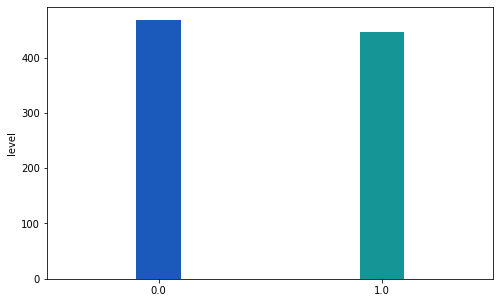

In [19]:
sns.set_style()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=df5.level.unique(),y=df5.level.value_counts(),palette='winter',ax=ax)
change_width(ax, .20)
plt.show()

C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

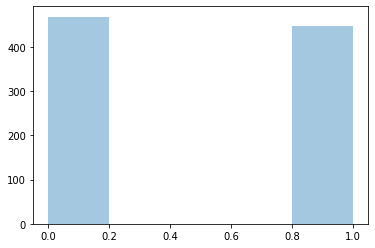

In [20]:
sizes = df5['level'].values
sns.distplot(sizes, kde=False)

#### Plot of the images

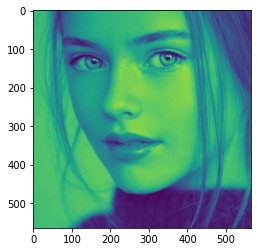

In [21]:
plt.imshow(df3['image'][55])
plt.show()

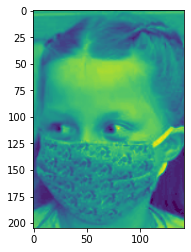

In [22]:
plt.imshow(df5['image'][0])
plt.show()

In [23]:
X = df5['image']
y = df5['level']

In [24]:
data = []
for im in X:
    new = cv2.resize(im, (50,50)) # Resizing the image
    data.append(new)

In [25]:
X_tt = []
for im in data:
    X_tt.append(tf.convert_to_tensor(im))
type(X_tt)

list

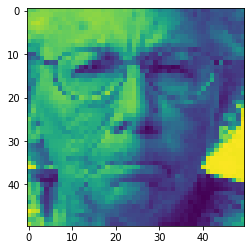

In [26]:
plt.imshow(X_tt[10])
plt.show()

In [27]:
x = np.array(X_tt).reshape(-1, 50, 50, 1)

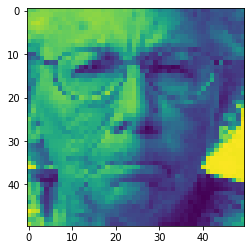

In [28]:
plt.imshow(x[10])
plt.show()

In [29]:
x.shape

(914, 50, 50, 1)

In [30]:
# Label encoding y
lbl = LabelEncoder()
y = lbl.fit_transform(y)

# Converting it into a categorical variable
y = to_categorical(y)

In [31]:
y.shape

(914, 2)

#### Split dataset into train and test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [33]:
print('Training Features Shape: ', X_train.shape)
print('Training Labels Shape: ', y_train.shape)
print('Testing Features Shape: ', X_test.shape)
print('Testing Labels Shape: ', y_test.shape)

Training Features Shape:  (685, 50, 50, 1)
Training Labels Shape:  (685, 2)
Testing Features Shape:  (229, 50, 50, 1)
Testing Labels Shape:  (229, 2)


#### Creating the CNN architecture using the Sequential model from TensorFlow

In [34]:
input_img_shape = x.shape[1:]
print(input_img_shape)

(50, 50, 1)


In [35]:
# Initializing a sequential keras model
model = Sequential()

# Adding a 2D convolution layer
model.add(
    Conv2D(
        filters=100,
        kernel_size=(3, 3),
        use_bias=True,
        input_shape=input_img_shape,
        activation="relu",
        strides=2,
    )
)

# Adding a max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a 2D convolution layer - Output Shape = 10 x 10 x 64
model.add(Conv2D(filters=64, kernel_size=(3, 3), use_bias=True, activation="relu"))

# Adding a max-pooling layer - Output Shape = 5 x 5 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a flatten layer - Output Shape = 5 x 5 x 64 = 1600
model.add(Flatten())

# Adding a dense layer - Output Shape = 50
model.add(Dense(50, activation="relu"))

# Adding a dropout
model.add(Dropout(0.2))

# Adding a dense layer with softmax activation
model.add(Dense(2, activation="softmax"))

# Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 100)       1000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        57664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 50)                8

In [36]:
start_time = datetime.now()

# Initializing an Adam optimizer
opt = Adam(lr=1e-3, decay=1e-5)

# Configuring the model for training
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model
model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.2)

end_time = datetime.now()
print("*Time required to train model: ",end_time - start_time)

C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
110/110 [==============================] - 3s 18ms/step - loss: 2.4730 - accuracy: 0.6898 - val_loss: 0.3785 - val_accuracy: 0.8321
Epoch 2/30
110/110 [==============================] - 2s 15ms/step - loss: 0.3174 - accuracy: 0.8978 - val_loss: 0.3271 - val_accuracy: 0.8686
Epoch 3/30
110/110 [==============================] - 2s 15ms/step - loss: 0.2845 - accuracy: 0.9033 - val_loss: 0.2942 - val_accuracy: 0.8759
Epoch 4/30
110/110 [==============================] - 1s 11ms/step - loss: 0.1567 - accuracy: 0.9453 - val_loss: 0.3380 - val_accuracy: 0.8686
Epoch 5/30
110/110 [==============================] - 2s 14ms/step - loss: 0.1404 - accuracy: 0.9544 - val_loss: 0.3207 - val_accuracy: 0.8978
Epoch 6/30
110/110 [==============================] - 1s 13ms/step - loss: 0.1245 - accuracy: 0.9580 - val_loss: 0.2493 - val_accuracy: 0.8978
Epoch 7/30
110/110 [==============================] - 1s 13ms/step - loss: 0.0766 - accuracy: 0.9726 - val_loss: 0.1953 - val_accuracy: 0.9197

In [37]:
predictions = model.predict(X_test)

In [38]:
y_test[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [39]:
def Print_level(i):
    plt.imshow(X_test[i].reshape(50, 50), cmap = plt.cm.binary)
    plt.show()
    if(np.argmax(np.round(predictions[i])) == 0):
        return print('Images with mask'.center(50,'-'))
    else: return print('Images with no mask'.center(60,'-'))

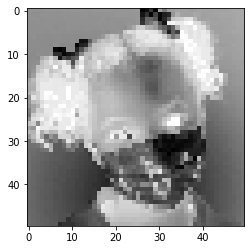

-----------------Images with mask-----------------


In [40]:
Print_level(3)

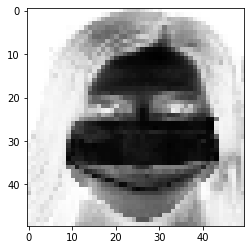

-----------------Images with mask-----------------


In [41]:
Print_level(5)

In [42]:
y_pred = [np.argmax(np.round(predictions[i])) for i in range(len(X_test))]
y_true = [np.argmax(y_test[i]) for i in range(len(X_test))]

In [43]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.inferno):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

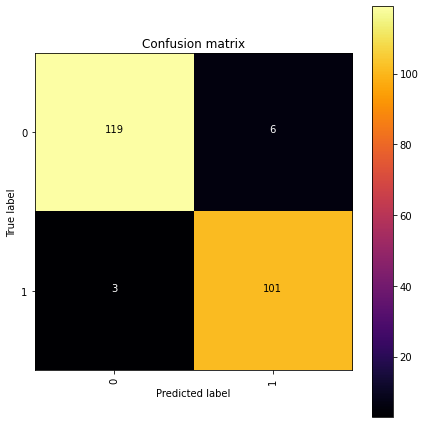

In [44]:
cm = confusion_matrix(y_true,y_pred)
cm_plot = plot_confusion_matrix(cm,classes=['0','1'])

In [45]:
print('Performance Report (Accuracy score is) :', metrics.accuracy_score(y_true, y_pred),'\n\n')
target=['0','1']
print('Classification Report'.center(65,'-'),'\n', metrics.classification_report(y_true,y_pred,target_names=target))

Performance Report (Accuracy score is) : 0.9606986899563319 


----------------------Classification Report---------------------- 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       125
           1       0.94      0.97      0.96       104

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



#### Export the tested model to a pickle file

In [46]:
with open('Face_mask_detection_model.pickle','wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://cf1a7ddc-ab40-4f78-9c8a-4a4369b46347/assets
